In [2]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 27)
pd.set_option('display.width', 1000)
print('asss')

asss


In [5]:
#loading and selection of best fit columns from jdt.csv
jdt_df = pd.read_csv("ar3.csv")
jdt_df['defects']=jdt_df['defects'].map({False:0,True:1})
print(jdt_df.info())
jdt_df_1 = jdt_df.iloc[:,1:30]
jdt_labels = jdt_df.iloc[:,30]
#print(jdt_df_1.info())
best_features = SelectKBest(score_func=chi2, k=15)
jdt_fit = best_features.fit_transform(jdt_df_1,jdt_labels)
jdt_fit_columns = best_features.get_support(indices=True)
jdt_fit_column_names = list(jdt_df_1.columns)
jdt_fit_selected_columns_name = []
for jdt_fit_column in jdt_fit_columns:
    jdt_fit_selected_columns_name.append(jdt_fit_column_names[jdt_fit_column])
print(jdt_fit_selected_columns_name)
print('asss')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                63 non-null     int64  
 1   total_loc                         63 non-null     int64  
 2   blank_loc                         63 non-null     int64  
 3   comment_loc                       63 non-null     int64  
 4   code_and_comment_loc              63 non-null     int64  
 5   executable_loc                    63 non-null     int64  
 6   unique_operands                   63 non-null     int64  
 7   unique_operators                  63 non-null     int64  
 8   total_operands                    63 non-null     int64  
 9   total_operators                   63 non-null     int64  
 10  halstead_vocabulary               63 non-null     int64  
 11  halstead_length                   63 non-null     int64  
 12  halstead_v

In [15]:
#loading and selection of best fit columns from safe.csv
ar5_df = pd.read_csv("apache.csv")
ar5_df['isDefective'] = ar5_df['isDefective'].map({False:0,True:1})
print(ar5_df.head())
ar5_df_1 = ar5_df.iloc[:,1:27]
ar5_labels = ar5_df.iloc[:,27]
#print(ar5_labels.head())
best_features = SelectKBest(score_func=chi2, k=15)
ar5_fit = best_features.fit_transform(ar5_df_1,ar5_labels)
ar5_fit_columns = best_features.get_support(indices=True)
ar5_fit_column_names = list(ar5_df_1.columns)
ar5_fit_selected_columns_name = []
for ar5_fit_column in ar5_fit_columns:
    ar5_fit_selected_columns_name.append(ar5_fit_column_names[ar5_fit_column])
print(ar5_fit_selected_columns_name)
print('dssd')

   id  AvgCyclomatic  AvgCyclomaticModified  AvgCyclomaticStrict  AvgEssential  AvgLine  AvgLineBlank  AvgLineCode  AvgLineComment  CountLine  CountLineBlank  CountLineCode  CountLineCodeDecl  ...  CountSemicolon  CountStmt  CountStmtDecl  CountStmtExe  MaxCyclomatic  MaxCyclomaticModified  MaxCyclomaticStrict  RatioCommentToCode  SumCyclomatic  SumCyclomaticModified  SumCyclomaticStrict  SumEssential  isDefective
0   1             12                     11                   14             4       82             5           61               7       2195             165           1185                191  ...             719        916            178           738             51                     51                   56                0.28            221                    197                  246            81            1
1   2              0                      0                    0             0        0             0            0               0        644               1       

In [10]:
#conversion of datasets
jdt_matrix = pd.DataFrame(jdt_fit)
ar5_matrix = pd.DataFrame(ar5_fit)
print(jdt_matrix.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       63 non-null     float64
 1   1       63 non-null     float64
 2   2       63 non-null     float64
 3   3       63 non-null     float64
 4   4       63 non-null     float64
 5   5       63 non-null     float64
 6   6       63 non-null     float64
 7   7       63 non-null     float64
 8   8       63 non-null     float64
 9   9       63 non-null     float64
 10  10      63 non-null     float64
 11  11      63 non-null     float64
 12  12      63 non-null     float64
 13  13      63 non-null     float64
 14  14      63 non-null     float64
dtypes: float64(15)
memory usage: 7.5 KB
None


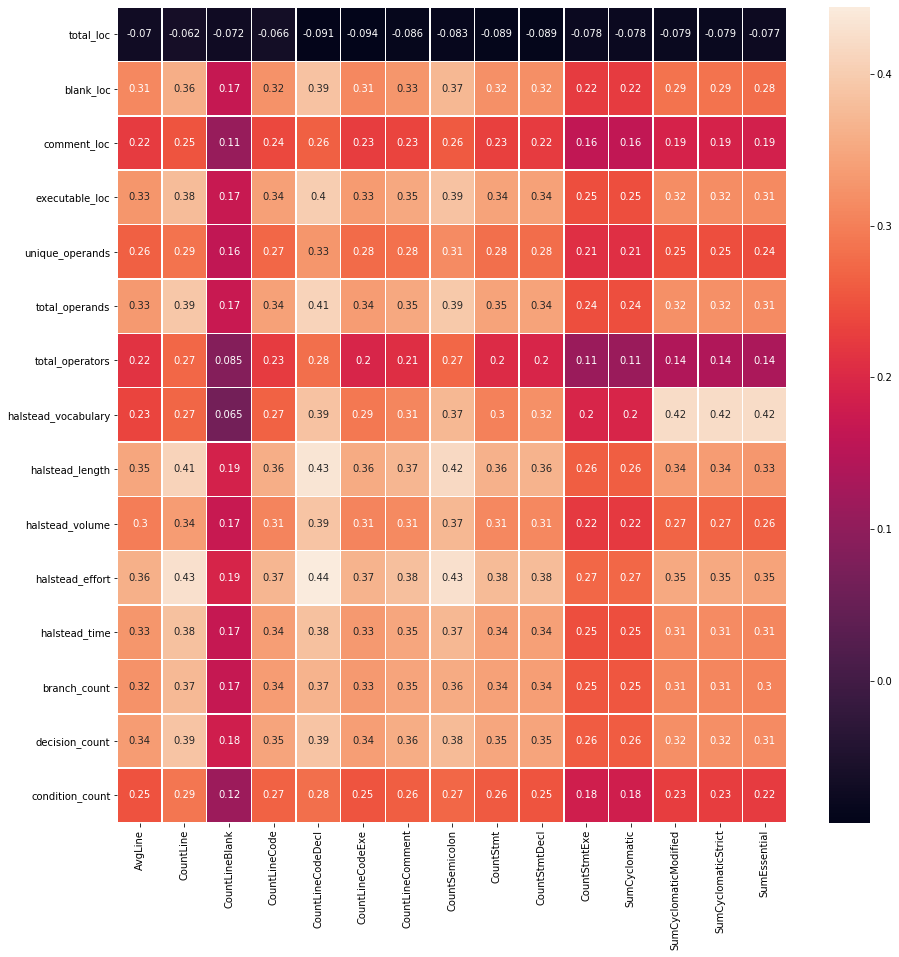

In [11]:
#Testing------------------------------------------------------------------
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))

#corr_data_frame = pd.concat([ar5_matrix, jdt_matrix], axis=1,).corr()
corr_data_frame = pd.concat([ar5_matrix, jdt_matrix], axis=1, keys=['ar5_matrix', 'jdt_matrix']).corr().loc['ar5_matrix', 'jdt_matrix']

#print(corr_data_frame)
svm = sn.heatmap(corr_data_frame, annot=True, linewidths=.5, ax=ax)
ax.set_yticklabels(jdt_fit_selected_columns_name)
ax.set_xticklabels(ar5_fit_selected_columns_name)
plt.yticks(rotation=0) 
plt.xticks(rotation=90)
plt.show()

figure = svm.get_figure()    
figure.savefig('svm_conf.png', dpi=400)

In [13]:
#calculation of correlation
corr_data_frame = pd.concat([ar5_matrix, jdt_matrix], axis=1, keys=['ar5_matrix', 'jdt_matrix']).corr().loc['ar5_matrix', 'jdt_matrix']
corr_metrix = pd.DataFrame(corr_data_frame.values,columns=ar5_fit_selected_columns_name)
corr_metrix['index_name'] = jdt_fit_selected_columns_name
corr_metrix.set_index('index_name', inplace = True)
#print("matix", corr_metrix)
#file = open("matrix_jdt_zing.txt", "w")
#file.write(str(corr_metrix))
#file.close()
#print('asss')

corr_metrix.to_csv("pde_ar4.csv")

corr_pairs = corr_metrix.unstack()

#print(corr_pairs)
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

                       index_name         
CountLineCodeExe       total_loc             -0.093627
CountLineCodeDecl      total_loc             -0.090884
CountStmtDecl          total_loc             -0.089416
CountStmt              total_loc             -0.089408
CountLineComment       total_loc             -0.086141
CountSemicolon         total_loc             -0.083372
SumCyclomaticStrict    total_loc             -0.079329
SumCyclomaticModified  total_loc             -0.079329
CountStmtExe           total_loc             -0.078408
SumCyclomatic          total_loc             -0.078408
SumEssential           total_loc             -0.076677
CountLineBlank         total_loc             -0.072475
AvgLine                total_loc             -0.070004
CountLineCode          total_loc             -0.065949
CountLine              total_loc             -0.062475
CountLineBlank         halstead_vocabulary    0.064873
                       total_operators        0.085025
                      

In [14]:
strong_pairs = sorted_pairs[(sorted_pairs) > 0.05]

print(strong_pairs.sort_index(axis=0, level=None, ascending=True, inplace=False, sort_remaining=True))

                       index_name         
AvgLine                blank_loc              0.311670
                       branch_count           0.323251
                       comment_loc            0.223567
                       condition_count        0.250070
                       decision_count         0.335379
                       executable_loc         0.326675
                       halstead_effort        0.361221
                       halstead_length        0.349296
                       halstead_time          0.326677
                       halstead_vocabulary    0.234290
                       halstead_volume        0.297332
                       total_operands         0.332008
                       total_operators        0.215009
                       unique_operands        0.264577
CountLine              blank_loc              0.358050
                       branch_count           0.373886
                       comment_loc            0.252671
                      